In [1]:
%matplotlib inline

from allennlp.data.vocabulary import Vocabulary
from stack_rnn_LM import StackRNNLanguageModel
from stack_rnn import StackRNNAgreementPredictor

import matplotlib.pyplot as plt
import torch
from matplotlib.widgets import Slider

import numpy as np

import seaborn as sns

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import pandas as pd

In [9]:
eg = {'tokens': torch.tensor([[17, 19, 12, 32, 25, 13,  6, 15, 25, 28, 11,  6, 12, 31, 26,  7,  6,  3,
          5, 39, 10, 34,  5, 39,  2,  3, 46,  3,  7,  3,  4,  2,  8,  0,  0],
        [ 4,  2, 11, 14,  3,  4,  9, 54,  2, 32, 47, 45,  3,  2,  3, 18,  7,  3,
          4,  2,  3,  7,  6,  7, 10,  7, 10,  4,  2,  3,  7, 10,  2,  8,  0],
        [11, 15,  4, 17,  2,  3,  7, 37, 36, 34,  7,  3,  4, 13,  7,  2, 10,  3,
          2, 10,  2,  7, 37, 36, 34,  7,  3,  4,  2, 29, 19, 12,  8,  0,  0],
        [ 4,  2, 33, 19, 30, 13, 32, 60, 34, 12,  3,  4,  2,  3,  4,  2,  3,  4,
          2, 15,  7,  3,  4,  5,  2, 40, 19, 30, 13,  3,  4,  5,  2,  8,  0],
        [16, 24, 46, 26,  7,  3, 53, 10, 53, 39, 26,  6, 27, 24,  6, 15, 46, 32,
         12,  2, 10,  5,  2, 39, 32, 21, 11, 12, 11,  8,  0,  0,  0,  0,  0],
        [ 4,  2, 15, 21, 14, 19, 12,  3,  4,  2, 24, 11, 13, 11, 35, 20,  3, 23,
          6, 17,  3,  4,  2,  3,  2,  2,  6, 29,  4,  2,  3,  5,  7, 11,  8],
        [ 3,  4,  2,  3,  7,  4,  2,  2, 14, 20,  7,  6, 27, 20, 17, 20, 20,  7,
         39, 20, 40,  3,  2,  3,  4, 53, 10, 20,  3,  2,  7,  3,  4, 53,  8],
        [ 2,  7, 10,  2,  7, 38, 13,  3,  4,  5,  2,  3, 13,  7, 39,  7,  5,  3,
          4,  5,  7,  5, 49, 10, 20,  9,  7,  7,  5,  3,  5,  7,  5, 48,  8],
        [11,  3,  4,  2, 15, 17,  7, 10,  7, 12, 28, 11,  3,  4,  2,  6,  4, 51,
          2, 19, 56, 24, 19, 12, 31, 32,  6, 15, 42,  6, 21, 36,  8,  0,  0],
        [10, 18,  2, 11, 11, 24,  3,  4, 11, 17,  5,  2,  3,  5,  6, 10, 16, 11,
         29,  3,  5,  5,  7,  3, 27,  2, 15,  4,  5, 10,  5,  2,  8,  0,  0],
        [11,  3,  4,  2,  3,  4,  2,  6, 35,  2, 47, 45, 13, 63, 11, 10, 11,  6,
          4, 13,  2,  7, 12,  3,  3, 26, 20,  7,  3,  2,  8,  0,  0,  0,  0],
        [15, 16, 29, 31,  6,  4,  5,  2, 62, 12,  3,  4,  5,  2,  6, 10,  4, 28,
          5,  4,  2,  6,  4, 28, 13, 10,  5, 24,  4,  2,  8,  0,  0,  0,  0],
        [10,  4,  5,  7,  3,  2, 22, 11, 30,  5,  6, 10, 21, 22, 11, 38, 19, 12,
         31,  4,  2,  3,  7, 21, 12, 19, 12,  3, 27,  2,  8,  0,  0,  0,  0],
        [26,  3, 23,  6, 11,  6, 36, 17, 19, 12,  3,  4,  2,  3,  5,  7, 10, 19,
         12,  4,  5,  2,  3,  4,  2,  2,  6,  4,  2,  6, 10,  4,  2,  8,  0],
        [ 4,  2,  3,  2, 47, 45, 13,  3, 17,  4,  2,  3,  4,  7, 15, 15, 46,  3,
          4,  5,  2,  3,  4,  2, 36, 28, 52, 15, 46,  3,  5,  8,  0,  0,  0],
        [ 9, 29,  3,  5,  2,  3,  9, 14,  7,  6,  3,  3, 20,  3,  2, 13,  3,  9,
          6, 20,  6,  9,  9,  9,  6,  9,  2,  6, 14,  8,  0,  0,  0,  0,  0]])}


#"""
vocab = Vocabulary.from_files("saved_models/vocabulary") #from_instances(train_dataset)
model = StackRNNLanguageModel(vocab, rnn_dim=100, stack_dim=16, rnn_cell_type=torch.nn.GRUCell)
with open("saved_models/stack-brown.th", "rb") as fh:
    model.load_state_dict(torch.load(fh))

res = model.forward(eg)

RuntimeError: Error(s) in loading state_dict for StackRNNLanguageModel:
	size mismatch for _embedder.token_embedder_tokens.weight: copying a param with shape torch.Size([10000, 314]) from checkpoint, the shape in current model is torch.Size([10000, 9968]).
	size mismatch for _rnn_cell.weight_ih: copying a param with shape torch.Size([400, 330]) from checkpoint, the shape in current model is torch.Size([300, 9984]).
	size mismatch for _rnn_cell.weight_hh: copying a param with shape torch.Size([400, 100]) from checkpoint, the shape in current model is torch.Size([300, 100]).
	size mismatch for _rnn_cell.bias_ih: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([300]).
	size mismatch for _rnn_cell.bias_hh: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([300]).
	size mismatch for _classifier.weight: copying a param with shape torch.Size([314, 100]) from checkpoint, the shape in current model is torch.Size([9968, 100]).
	size mismatch for _classifier.bias: copying a param with shape torch.Size([314]) from checkpoint, the shape in current model is torch.Size([9968]).

In [4]:
torch.LongTensor([[4, 9, 2, 5],[4, 9, 2, 5]]).shape

torch.Size([2, 4])

In [5]:
torch.LongTensor([[4, 9, 2, 5]]).shape

torch.Size([1, 4])

In [6]:

res = model({"tokens": torch.LongTensor([[1,2,1,2,1]])})

In [7]:
res

{'prediction': tensor(1.)}

In [278]:
model({"tokens": torch.LongTensor([[4, 9, 2, 5]])})

TypeError: iteration over a 0-d tensor

In [269]:
print(strength.dim())

0


In [266]:
strength = torch.tensor(1.2)

In [259]:
strength = torch.Tensor([0])

In [260]:
if (strength.dim()==0 and strength==0) or (strength.dim() > 0 and all(strength == 0)):
    print("hi")

hi


In [248]:
if (strength.dim==0 and strength==0) or all(strength == 0):
    print("hi")

hi


In [212]:
res['instructions'][0].pop_distributions

tensor([[0.9761, 0.0080, 0.0105, 0.0054],
        [0.9761, 0.0080, 0.0105, 0.0054]], grad_fn=<SoftmaxBackward>)

In [25]:
frame = pd.DataFrame({"type":["A"]*3+["B"]*3, "val":s1+s2, "x":[1,2,3]*2})

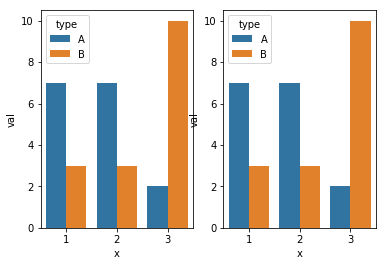

In [34]:
plt.subplot(1,2,1)
sns.barplot(x="x", y="val", hue="type", data=frame)
plt.subplot(1,2,2)
sns.barplot(x="x", y="val", hue="type", data=frame)


In [33]:
plt.subplot?

In [183]:
x=np.array([1,2,3])/10.
s1 = np.array([7,7,2])/10.
s2 = np.array([3,3,10,5])/10.

In [12]:
def mybar(ser1, lab1, ser2, lab2, cat_label, ax=None):
    y_label = "Probability"
    n = len(ser1)
    df1 = pd.DataFrame({"type": lab1, 
                          y_label: ser1, 
                          cat_label: list(range(len(ser1)))})
    df2 = pd.DataFrame({"type": lab2, 
                          y_label: ser2, 
                          cat_label: list(range(len(ser2)))})
    sns.barplot(x=cat_label, y=y_label, hue="type", data=pd.concat([df1, df2], ignore_index=True), ax=ax)
    
    '''   plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off'''

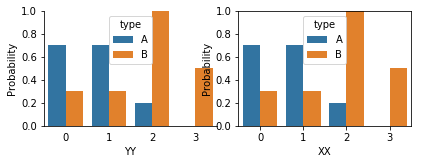

In [187]:
axis_width = 0.4
axis_height = 0.4
horiz_space = 0.05

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, axis_width, axis_height],
                   xticklabels=[], ylim=(0, 1.0), )
#restyle(ax1)
mybar(s1, 'A', s2, "B", "YY", ax=ax1)

ax2 = fig.add_axes([0.1+(axis_width+horiz_space), 0.1, axis_width, axis_height],
                    ylim=(0, 1.0), xlabel="hi")
#restyle(ax2)
mybar(s1, "A", s2,"B", "XX", ax=ax2)

firststyle(ax1)

In [13]:
def firststyle(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0])
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,)      # ticks along the bottom edge are off
    #ax.legend(loc=3)

def restyle(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,)      # ticks along the bottom edge are off
    ax.get_legend().remove()

In [48]:
axis_width = 0.2
axis_height = 0.4
horiz_space = 0.05

def profile_sentence(results, sentence, fig, offset=0):
    sentence_ix = 0
    plots = []
    
    margin=0.2
    width_per_plot = (1.0-margin)/(len(sentence)-1)
    
    print("The label under each plot is the word being predicted at that step")
    for word_n in range(offset, len(sentence)-1):
        instructs = results['instructions'][word_n]
        """
        # for many sentences
        push_strength = instructs.push_strengths.data[sentence_ix]
        pop_strength = instructs.pop_strengths.data[sentence_ix]
        read_strengths = instructs.read_strengths.data[sentence_ix]
        pop_distribution = instructs.pop_distributions.data[sentence_ix,:]
        read_distribution = instructs.read_distributions.data[sentence_ix,:]
        """
        #for just one
        push_strength = instructs.push_strengths.data
        pop_strength = instructs.pop_strengths.data
        read_strengths = instructs.read_strengths.data
        pop_distribution = instructs.pop_distributions.data[sentence_ix,:]
        read_distribution = instructs.read_distributions.data[sentence_ix,:]
        
        ax1 = fig.add_axes([margin/2.0 + word_n*width_per_plot, margin, 0.8*width_per_plot, 2*width_per_plot], 
                           ylim=(0, 1.0), xlabel=sentence[word_n])
        label = "Read: {0:.2f}\nPop:{1:.2f}\n{2}".format(read_strengths, pop_strength, sentence[word_n+1])
        mybar(read_distribution, "Read Strength", pop_distribution, "Pop Strength", label, ax=ax1)
        restyle(ax1)
        plots.append(ax1)
        
    firststyle(plots[0])
        


In [59]:
fig.add_axes?

In [50]:
fig.add_axes?

The label under each plot is the word being predicted at that step


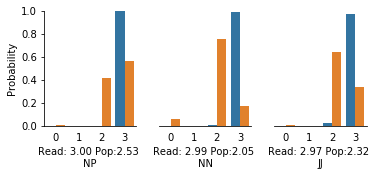

In [49]:
from predict_trees import brown_predict

sent = ["AT", "NP", "NN", "JJ", "NN", "VB", "NN", "JJ", "NN", "VB"]
res = brown_predict(sent)

fig = plt.figure()
profile_sentence(res, sent, fig)

In [55]:
AX1, AX2 = fig.subplots(2,1)

In [63]:
margin=0.2
axes = fig.subplots(1,5,sharey="row", subplot_kw={"rect":[margin/2.0 + word_n*width_per_plot, margin, 0.8*width_per_plot, 2*width_per_plot], 
                           "ylim": (0, 1.0), "xlabel": sentence[word_n]})


NameError: name 'margin' is not defined

In [ ]:
rect : sequence of float
    The dimensions [left, bottom, width, height] of the new axes. All
    quantities are in fractions of figure width and height.

In [62]:
fig.subplots?